Sample dataset saved as ecommerce_sales_data.csv


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


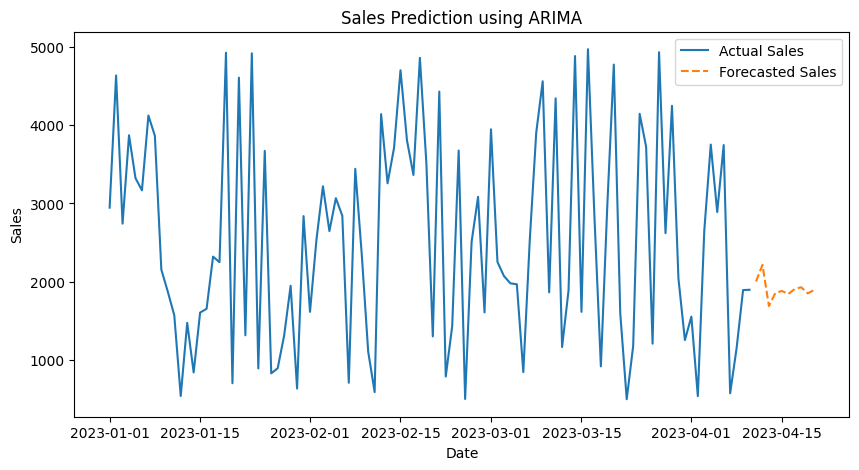

Customer Segmentation:
               customer_id  customer_segment
purchase_date                               
2023-01-01               1                 1
2023-01-02               2                 2
2023-01-03               3                 2
2023-01-04               4                 0
2023-01-05               5                 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Generate Sample E-commerce Data
data = {
    'customer_id': np.arange(1, 101),
    'recency': np.random.randint(1, 365, 100),  # Days since last purchase
    'frequency': np.random.randint(1, 50, 100),  # Total purchases
    'monetary': np.random.randint(100, 5000, 100),  # Total spending
    'purchase_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': np.random.randint(500, 5000, 100)  # Sales amount
}
df = pd.DataFrame(data)

df.to_csv('ecommerce_sales_data.csv', index=False)
print("Sample dataset saved as ecommerce_sales_data.csv")

# Step 2: Customer Segmentation using RFM & K-Means
rfm = df[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=3, random_state=42)
df['customer_segment'] = kmeans.fit_predict(rfm_scaled)

# Step 3: Sales Prediction using ARIMA
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df.set_index('purchase_date', inplace=True)

# Train ARIMA model
arima_model = ARIMA(df['sales'], order=(5,1,0))
model_fit = arima_model.fit()
predictions = model_fit.forecast(steps=10)

# Plot Sales Prediction
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], label='Actual Sales')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], predictions, label='Forecasted Sales', linestyle='dashed')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction using ARIMA')
plt.show()

# Display segmented customers
print("Customer Segmentation:")
print(df[['customer_id', 'customer_segment']].head())
